# 黑色星期五消费行为分析

观察从kaggle上下载的csv文件，共有11个字段：

`User_ID`：用户编码

`Product_ID`：产品编码

`Gender`：性别（F表示女性，M表示男性）

`Age`：年龄（分0~17、18~25、26~35、36~45、46~50、51~55、55+共7个年龄段）

`Occupation`：职业（分为0~20 共20个类别）

`City_Category`：城市类别（分ABC共3个类别）

`Stay_In_Current_City_Years`：在当前城市停留的年数（分0、1、2、3、4+共5个类别）

`Marital_Status`：婚姻状况（0表示未婚，1表示已婚）

`Product_Category_1`：商品所属分类1

`Product_Category_2`：商品所属分类2

`Product_Category_3`：商品所属分类3

`Purchase`：购买价格，以美元计算

商品分类标准分为3种，根据商品品牌、用途、风格等不同标准进行分类。

In [1]:
#导入个各种分析模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#读取数据文件
df = pd.read_csv('C:/Users/17372/Desktop/BlackFriday.csv')

In [3]:
#检查是否成功读取
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## 分析大纲

1. 商品分析
    - 产品销售排行
    - 产品销售额排行
    - 分类商品销售排行
    - 分类商品销售额排行
2. 用户分析
    - 性别分布
    - 年龄分布
    - 职业分布
    - 城市类别分布
    - 优质客户分析
    - 综合分析

In [4]:
# 检查数据是否有缺失值
df.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

可以看出商品类别2和类别3有缺失值，接下来我们需要处理这些缺失值，
为了不删除其他的数据，建议采用补全缺失值，我们这儿用常数0来代替

In [5]:
df.fillna(0,inplace=True)

In [6]:
df.isnull().any() #缺失值已经全部补全

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
dtype: bool

In [7]:
#导入seaborn库
import seaborn as sns

### 商品分析

#### 商品销售排行以及销售额排行

商品类别1

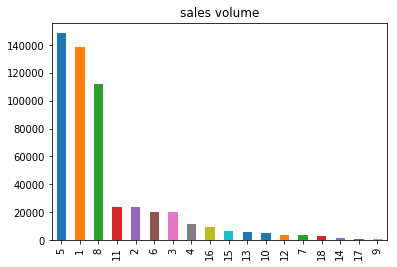

In [8]:
pd.value_counts(df['Product_Category_1']).sort_values(ascending=False).plot(kind='bar',title='sales volume')

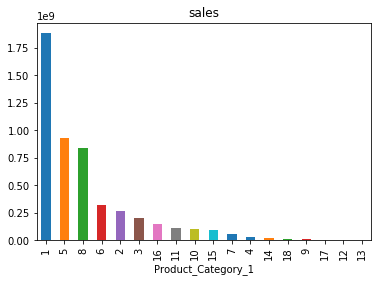

In [9]:
df.groupby('Product_Category_1').Purchase.sum().sort_values(ascending=False).plot(kind='bar',title='sales')

分析商品类别1可知，销售量前三分别是5号，1号以及8号；销售额前三是1号，5号以及8号。

商品类别2

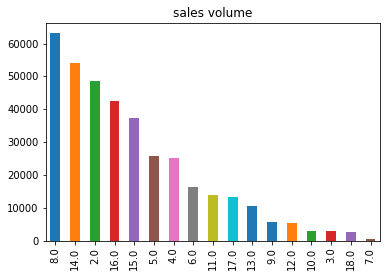

In [10]:
group_volume = pd.value_counts(df['Product_Category_2']).sort_values(ascending=False)
group_volume.drop(0).plot(kind='bar',title='sales volume')

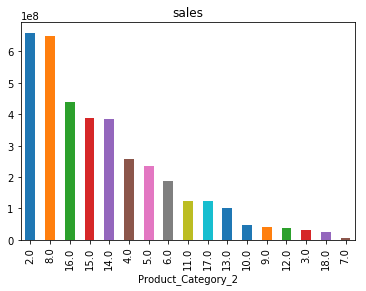

In [11]:
group_sales = df.groupby('Product_Category_2').Purchase.sum().sort_values(ascending=False).drop(0).plot(kind='bar',title='sales')

分析商品类别2，销售量前三是8号，14号，2号；销售额前三是2号，8号，16号

商品类别3

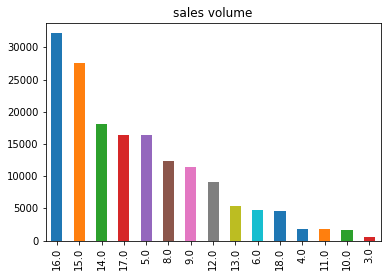

In [12]:
pd.value_counts(df['Product_Category_3']).sort_values(ascending=False).drop(0).plot(kind='bar',title='sales volume')

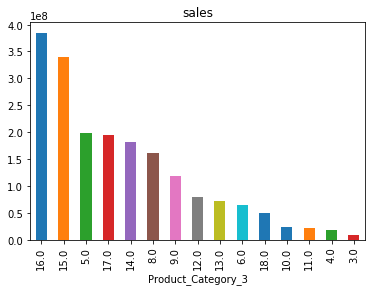

In [13]:
df.groupby('Product_Category_3').Purchase.sum().sort_values(ascending=False).drop(0).plot(kind='bar',title='sales')

分析商品类别3，销售量前三是16号，15号，14号；销售额前三是16号，15号，5号。

#### 产品销售量以及销售额排行

In [14]:
pd.value_counts(df['Product_ID']).sort_values(ascending=False).head()

P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
Name: Product_ID, dtype: int64

In [15]:
df.groupby('Product_ID').Purchase.sum().sort_values(ascending=False).head()

Product_ID
P00025442    27532426
P00110742    26382569
P00255842    24652442
P00184942    24060871
P00059442    23948299
Name: Purchase, dtype: int64

- 对于具体产品而言，销售量前三是P00265242，1858件；P00110742 1591件；P00025442 1586件
- 销售额前三是P00025442 2753万美元；P00110742 2638万美元； P00255842 2465万美元

### 用户分析

- 性别分析

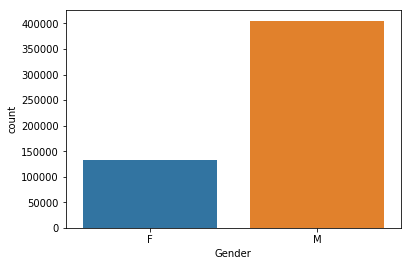

In [16]:
sns.countplot(df['Gender'])

In [17]:
df.groupby('Gender').Purchase.sum()

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

分析性别可知，男性买家大约为女性买家的3倍，可能产品倾向于男性，但是总的购买金额男性为女性买家的3.4倍，相对而言平均每个男性花费比女性买家多

- 年龄分析

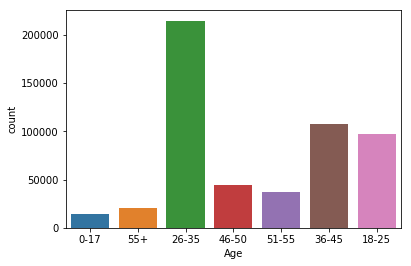

In [18]:
sns.countplot(df['Age'])

由图可知，26-35阶段的用户最多，其次是36-45阶段，这也大致符合社会的实际情况

- 职业分析

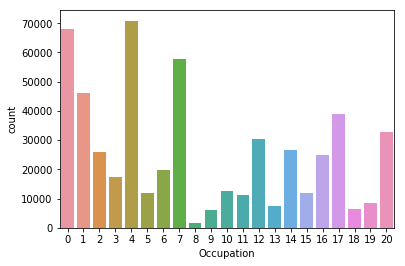

In [19]:
sns.countplot(df['Occupation'])

4号职业的买家最多，其次是0号，7号；8号职业最少。

- 城市类别分析

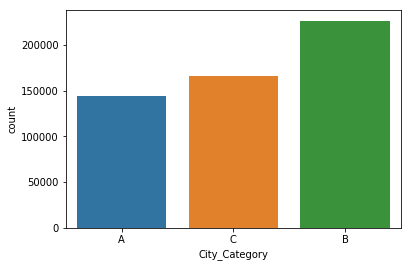

In [20]:
sns.countplot(df['City_Category'])

B城最多，C城其次，A城最少

- 优质客户分析

In [21]:
sales = df.groupby('User_ID').Purchase.sum().sort_values(ascending=False).head()
sales

User_ID
1004277    10536783
1001680     8699232
1002909     7577505
1001941     6817493
1000424     6573609
Name: Purchase, dtype: int64

In [22]:
quantity = pd.value_counts(df['User_ID']).sort_values(ascending=False).head()
quantity

1001680    1025
1004277     978
1001941     898
1001181     861
1000889     822
Name: User_ID, dtype: int64

由这两组数据可知，消费排行前三的客户是1004277，1001680，1002909，推荐将这些客户列为优质客户，购买量上来说前三是1001680，1004277，1001941，和之前差入不大

- 综合分析<br>
我们可以换个角度，将性别和婚姻情况组合起来分析，即分析未婚男，已婚男，未婚女，已婚女。

In [23]:
df['combined'] = df.apply(lambda x : '%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(df['combined'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


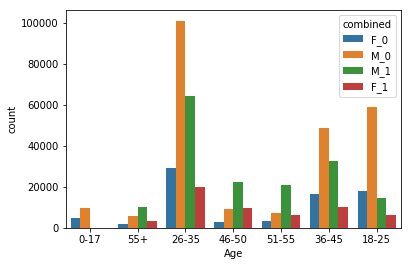

In [24]:
sns.countplot(df['Age'],hue=df['combined'])

综合起来看，26-35的未婚男性购买商品最多，而且在26岁以上各个年龄阶段，不管已婚还是未婚，男性用户均多余女性用户，由于不清楚商品的具体种类，不能下结论说男性购物将成为潮流，也可能是商品原因

Text(0.5,1,'average purchase by gender')

<Figure size 1440x720 with 0 Axes>

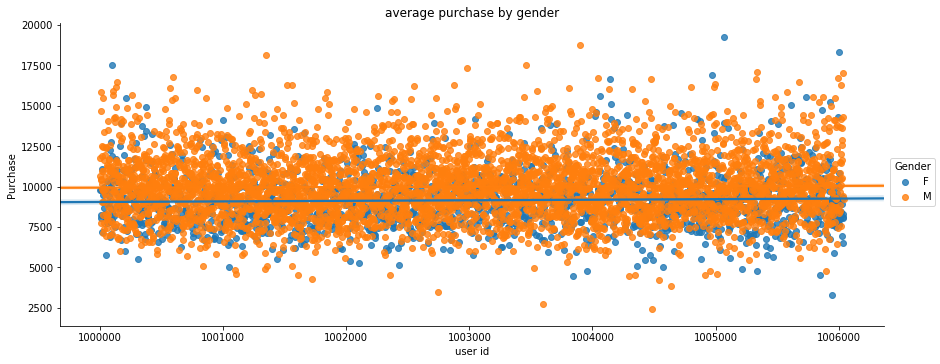

In [25]:
df_purchase_gender = df.groupby(['User_ID','Gender']).agg({'Purchase':np.mean}).reset_index()
df_purchase_age = df.groupby(['User_ID','Age']).agg({'Purchase':np.mean}).reset_index()
plt.figure(figsize=(20,10))
sns.lmplot(x='User_ID',y='Purchase',data=df_purchase_gender,hue='Gender',aspect=2.5)
plt.xlabel('user id')
plt.title('average purchase by gender')

Text(0.5,1,'Average purchase by Age')

<Figure size 1440x720 with 0 Axes>

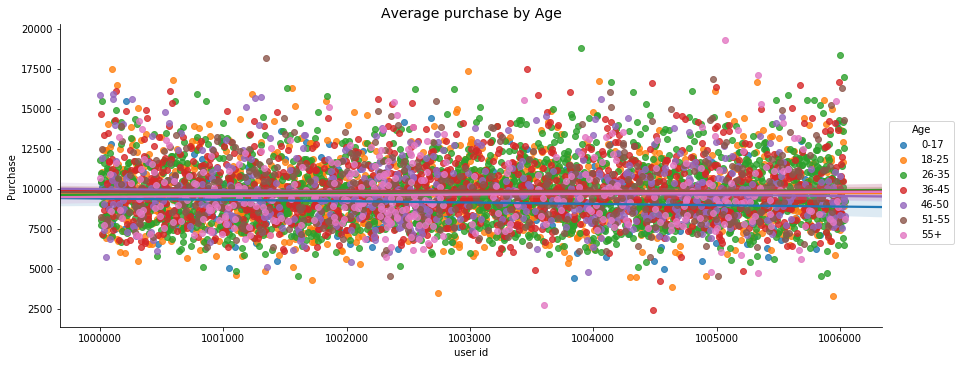

In [26]:
plt.figure(figsize=(20,10))
age_order = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
sns.lmplot('User_ID','Purchase',data=df_purchase_age,hue='Age',hue_order=age_order,aspect=2.5)
plt.xlabel('user id')
plt.title('Average purchase by Age',fontsize=14)

## 总结

1. 男性消费者多于女性消费者
2. 在商品类别1中，1号，5号，8号占据销售量以及销售额的前三；在商品类别2中，销售量前三是8号，14号，2号，销售额前三是2号，8号，16号；在商品类别3中，销售量前三是16号，15号，14号，销售额前三是16号，15号，5号。
3. 26-35年龄阶段中消费最活跃，无论性别
4. 0号职业消费能力最强，属于高消费人群，8号消费能力最弱
5. B城的订单量最大，C城其次，A城最少
6. 1004277，1001680这两个客户可以被列为VIP对象，消费能力最强
7. 在26-45的正常年龄阶段，未婚的消费均比已婚强